<a href="https://colab.research.google.com/github/vladimyr02/cd-Vladimyr-Gonzalez-2023/blob/main/ProyectoFinalClase2CD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyproj

In [3]:
!pip install geopandas

In [4]:
!pip uninstall cython -y
!pip install cython
!pip uninstall cartopy -y
!pip install cartopy

Found existing installation: Cython 3.0.5
Uninstalling Cython-3.0.5:
  Successfully uninstalled Cython-3.0.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 112.7 MB/s eta 0:00:00


In [5]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.2
Uninstalling shapely-2.0.2:
  Successfully uninstalled shapely-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.7/279.7 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.2-cp310-cp310-linux_x86_64.whl size=1027141 sha256=0f4dca2524afb770bd2a5adfb1e4ba68e17da1993444ced1a367123ee07ee737
  Stored in directory: /root/.cache/pip/wheels/1f/6b/52/14cb4558cddc0fd89de08f0e1fd08f816f4f3e1969311377c6
Successfully built shapely
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
li

In [6]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time

In [7]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/datasets/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [8]:
#Se formatean los datos de fecha
from datetime import datetime

df['fec_not2'] = pd.to_datetime(df['fec_not'], format="%d/%m/%Y")
df['fecha_contagio2'] = pd.to_datetime(df['fecha_contagio'], format="%d/%m/%Y")
df['inicio_sintomas2'] = pd.to_datetime(df['inicio_sintomas'], format="%d/%m/%Y")
df['fec_hos_2'] = pd.to_datetime(df['fec_hos_'], format="%d/%m/%Y")
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,fec_not2,fecha_contagio2,inicio_sintomas2,fec_hos_2
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,2020-01-10,NaT
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,2020-01-07,NaT
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,2020-01-08,NaT
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,2020-01-06,NaT
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-07,2020-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,2020-03-03,NaT
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-06,2020-03-13
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,2020-03-04,NaT
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,2020-03-05,NaT


In [9]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [10]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,aum_hematocrito,conducta,latitud,longitud,fec_not2,fecha_contagio2,inicio_sintomas2,fec_hos_2,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,2020-01-10,NaT,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,2020-01-07,NaT,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,2020-01-08,NaT,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,2020-01-06,NaT,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-07,2020-01-10,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,2020-03-03,NaT,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-06,2020-03-13,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,2020-03-04,NaT,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,2020-03-05,NaT,710198.574916,780930.648555


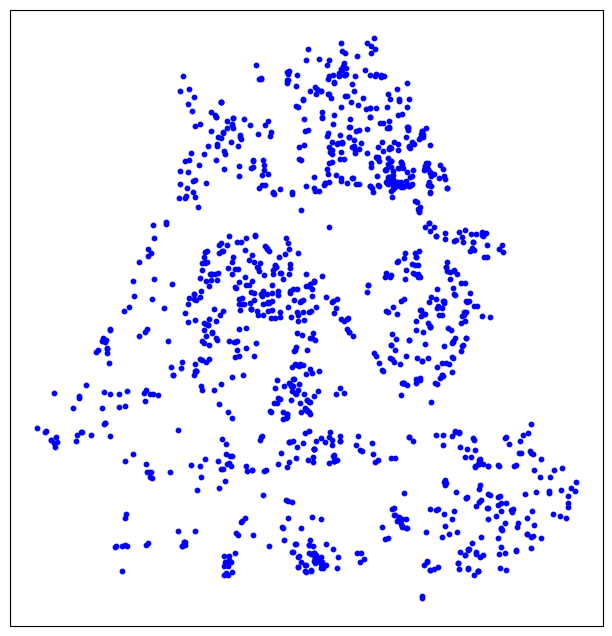

In [11]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)
plt.show()


In [12]:
#Se carga la cartografía de Floridablanca/Melbourne
url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

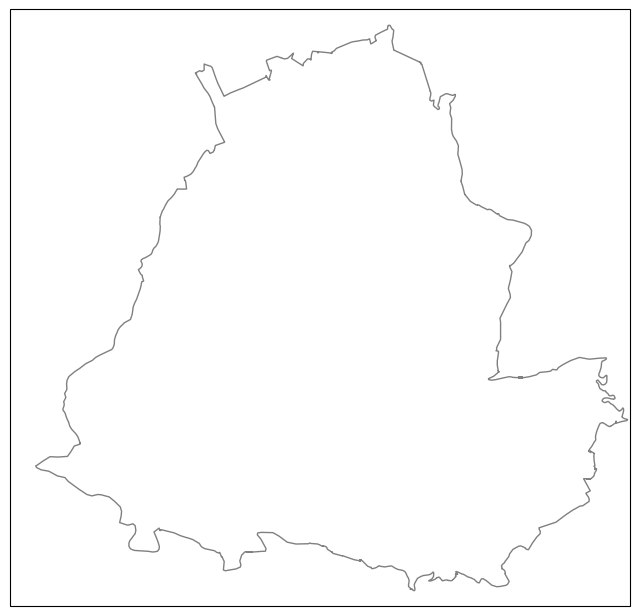

In [13]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

plt.show()

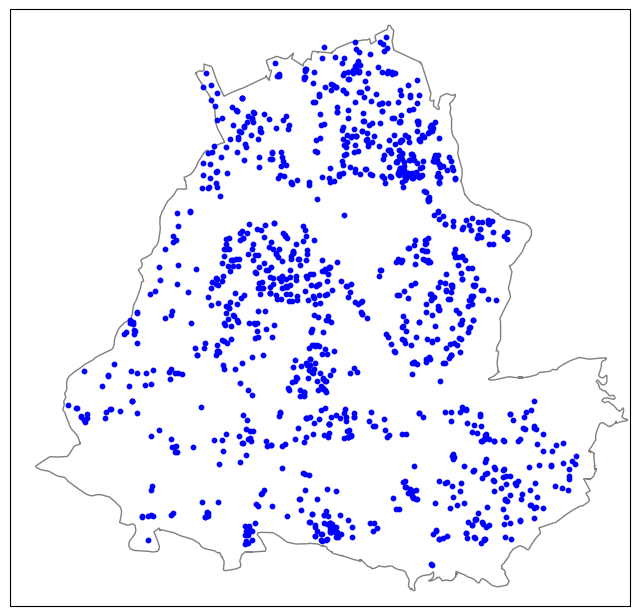

In [14]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

plt.show()

In [15]:
# Crear una lista de coordenadas UTM
utm_coords = df[['longitud', 'latitud']].values
utm_coords

array([[-73.10250092,   7.07601118],
       [-73.10540009,   7.07949543],
       [-73.09100342,   7.09029007],
       ...,
       [-73.10326385,   7.09139061],
       [-73.09700012,   7.06108332],
       [-73.08044434,   7.06252098]])

In [16]:
import geopandas as gpd
import urllib.request

def calculate_polygon_area(df, shapefile_url):
    """
    Calculate the area of a polygon using a shapefile.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the longitude and latitude data.
    - shapefile_url (str): The URL of the shapefile to use for the area calculation.

    Returns:
    - area (float): The area of the polygon in square meters.
    """

    # Download the shapefile files
    url = shapefile_url
    file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]
    for file in file_list:
        urllib.request.urlretrieve(url + file, file)

    # Read the shapefile into a GeoDataFrame
    gdf = gpd.read_file('68276_urbano.shp')

    # Ensure the GeoDataFrame is in a suitable projection (e.g., UTM)
    gdf = gdf.to_crs('EPSG:32618')  # Change 'EPSG:32618' to the appropriate UTM zone for your area

    # Calculate the area and sum it up (in square meters)
    area = gdf.geometry.area.sum()

    return area

# Example usage:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
shapefile_url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'
polygon_area = calculate_polygon_area(df, shapefile_url)
print(f"Area of the polygon: {polygon_area} square meters")


Area of the polygon: 14180920.862356503 square meters


In [17]:
import numpy as np

# Función para calcular la distancia euclidiana entre dos puntos
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Función para calcular el índice de Ripley con una distancia fija
def ripley_k_fixed_distance(data, fixed_distance):
    n = len(data)
    count = 0

    for i in range(n):
        for j in range(n):
            if j > i:
                dist = euclidean_distance(data[i], data[j])
                if dist <= fixed_distance:
                    count += 1

    ripley_value = (polygon_area/(n*n))*count #(count / n) / (np.pi * fixed_distance * fixed_distance)
    return ripley_value

In [18]:
# Distancia fija de 100 unidades UTM
fixed_distance = 100

# Calcular el índice de Ripley con la distancia fija para el conjunto original
ripley_original = ripley_k_fixed_distance(utm_coords, fixed_distance)
ripley_original

7084841.999774782

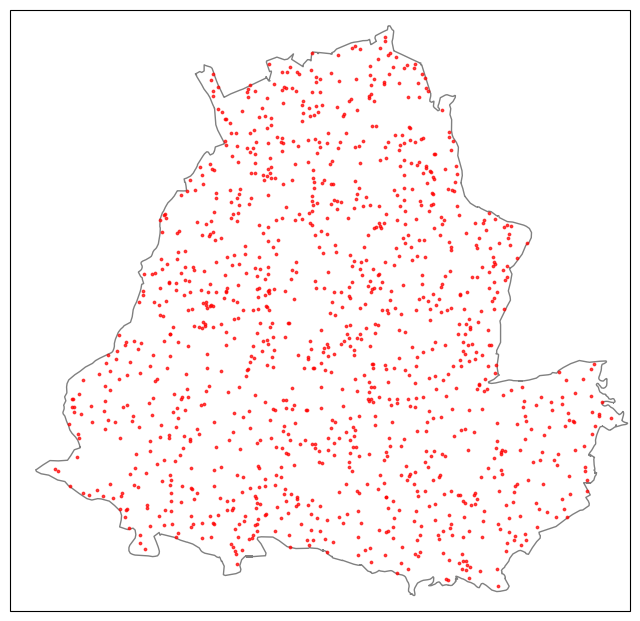

In [19]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
import cartopy.crs as ccrs

# Cargar el archivo shapefile
gdf = gpd.read_file('68276_urbano.shp')

# Obtener el polígono como una instancia de Polygon
polygon = gdf.unary_union

# Número de puntos aleatorios deseados
num_points = 1200

# Generar puntos aleatorios dentro del polígono
random_points = []
while len(random_points) < num_points:
    x = np.random.uniform(polygon.bounds[0], polygon.bounds[2])
    y = np.random.uniform(polygon.bounds[1], polygon.bounds[3])
    point = Point(x, y)
    if point.within(polygon):
        random_points.append(point)

# Convierte la lista de puntos aleatorios en un GeoDataFrame
random_gdf = gpd.GeoDataFrame(geometry=random_points, crs=gdf.crs)

# Graficar el polígono y los puntos aleatorios
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

# Dibuja el polígono primero
for poli in gdf['geometry']:
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray', zorder=1)

# Luego, dibuja los puntos aleatorios (por encima del polígono)
random_gdf.plot(ax=ax, marker='o', color='red', markersize=3, alpha=0.7, zorder=2)

plt.show()

In [21]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon, Point
import pyproj

# Cargar el archivo shapefile
gdf = gpd.read_file('68276_urbano.shp')

# Definir el sistema de coordenadas original (latitud y longitud)
crs_original = {'init': 'epsg:4326'}

# Obtener el polígono como una instancia de Polygon
polygon = gdf.unary_union

# Número de puntos aleatorios deseados
num_points = 1262

utm_coords_random_list=[]

for _ in range(9):
  # Generar puntos aleatorios dentro del polígono
  random_points = []
  while len(random_points) < num_points:
      x = np.random.uniform(polygon.bounds[0], polygon.bounds[2])
      y = np.random.uniform(polygon.bounds[1], polygon.bounds[3])
      point = Point(x, y)
      if point.within(polygon):
          random_points.append(point)

  # Definir el sistema de coordenadas de destino (UTM, Zona 18 Norte)
  crs_destination = {'init': 'epsg:32618'}

  # Crear el transformador de coordenadas
  transformer = pyproj.Transformer.from_crs(crs_original, crs_destination, always_xy=True)

  # Convertir los puntos aleatorios a UTM
  utm_coords_random = [transformer.transform(point.x, point.y) for point in random_points]
  utm_coords_random_list.append(utm_coords_random)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


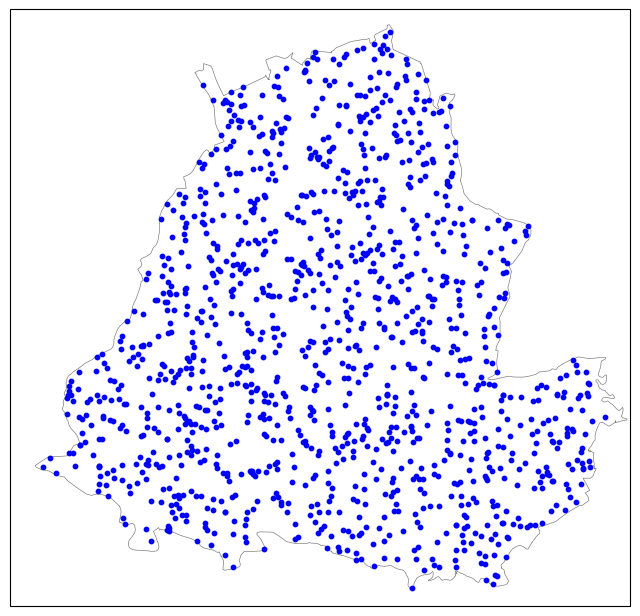

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import shapefile
import numpy as np

# Coordenadas UTM de la región de interés
lower_easting = 600000
upper_easting = 650000
lower_northing = 7500000
upper_northing = 7550000

# Crear la figura y el eje con la proyección PlateCarree
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

# Agregar características de fondo, como la costa
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

# Cargar el shapefile de los límites de la región
sf = shapefile.Reader('68276_urbano.shp')
shapes = sf.shapes()
for shape in shapes:
    vertices = np.array(shape.points)
    ax.plot(vertices[:, 0], vertices[:, 1], transform=ccrs.PlateCarree(), color='gray', linewidth=0.5)

# Generar puntos aleatorios en coordenadas UTM
num_points = len(utm_coords_random)
x_coords, y_coords = zip(*utm_coords_random)

# Graficar los puntos aleatorios
ax.scatter(x_coords, y_coords, transform=ccrs.UTM(18), zorder=10, c='b', s=10)

plt.show()

In [27]:
import numpy as np

# Definir límites de la región de interés en coordenadas UTM
lower_easting = 600000
upper_easting = 650000
lower_northing = 7500000
upper_northing = 7550000

# Definir el tamaño de la cuadrícula
grid_size = 100  # puedes ajustar este valor según la resolución deseada

# Calcular la longitud y altura de la cuadrícula
grid_x = np.linspace(lower_easting, upper_easting, grid_size)
grid_y = np.linspace(lower_northing, upper_northing, grid_size)

# Crear una matriz para almacenar la densidad de puntos en cada celda
density_matrix = np.zeros((grid_size - 1, grid_size - 1))

# Iterar sobre cada conjunto de puntos aleatorios
for utm_coords_random in utm_coords_random_list:
    # Iterar sobre cada conjunto de coordenadas dentro de utm_coords_random
    for point in utm_coords_random:
        x, y = point
        # Verificar en qué celda de la cuadrícula cae el punto y aumentar la densidad
        for i in range(len(grid_x) - 1):
            for j in range(len(grid_y) - 1):
                if grid_x[i] <= x < grid_x[i + 1] and grid_y[j] <= y < grid_y[j + 1]:
                    density_matrix[i][j] += 1

# Parámetros para la matriz
filas = 100
cols = 100
x_ini = 0
x_fin = 100
y_ini = 0
y_fin = 100

# Función de distancia (kernel)
def distancia(XI, YI, X2, Y2):
    return ((XI - X2) * 2 + (YI - Y2) * 2) + 0.5

# Crear matriz de distancias
m_distancias = np.zeros((filas, cols))

# Calcular distancias usando el kernel
for i in range(filas):
    for j in range(cols):
        for k in range(x_ini, x_fin):
            for l in range(y_ini, y_fin):
                m_distancias[i][j] += distancia(i, j, k, l)

# Mostrar la matriz de distancias
print(m_distancias)



[[-1975000. -1955000. -1935000. ...   -35000.   -15000.     5000.]
 [-1955000. -1935000. -1915000. ...   -15000.     5000.    25000.]
 [-1935000. -1915000. -1895000. ...     5000.    25000.    45000.]
 ...
 [  -35000.   -15000.     5000. ...  1905000.  1925000.  1945000.]
 [  -15000.     5000.    25000. ...  1925000.  1945000.  1965000.]
 [    5000.    25000.    45000. ...  1945000.  1965000.  1985000.]]


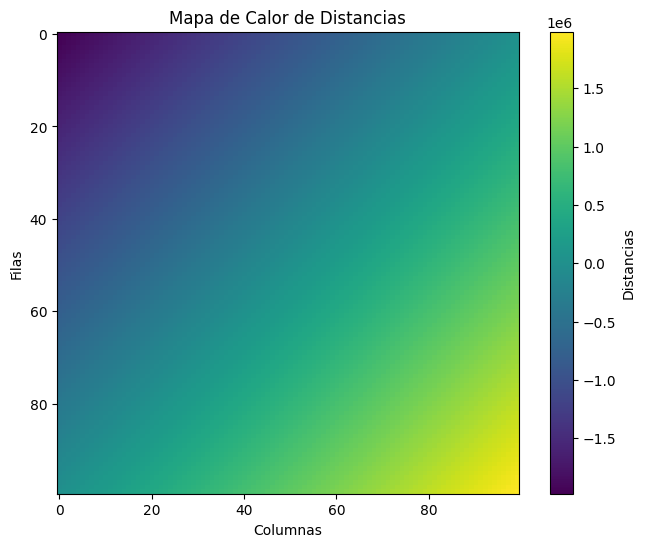

In [30]:
import matplotlib.pyplot as plt

# Generar el mapa de calor
plt.figure(figsize=(8, 6))
plt.imshow(m_distancias, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Distancias')

# Agregar título y etiquetas de ejes
plt.title('Mapa de Calor de Distancias')
plt.xlabel('Columnas')
plt.ylabel('Filas')

# Mostrar el mapa de calor
plt.show()


In [31]:
import numpy as np

# Definición de las funciones de kernel

def uniform_kernel(d, r):
    return 1 if d <= r else 0

def triangular_kernel(d, r):
    return max(0, 1 - d / r)

def gaussian_kernel(d, r):
    return np.exp(-0.5 * (d / r)**2) / (r * np.sqrt(2 * np.pi))

def epanechnikov_kernel(d, r):
    return max(0, 1 - (d / r)**2)

def exponential_kernel(d, r):
    return np.exp(-d / r)

def cosine_kernel(d, r):
    return np.cos(np.pi * d / (2 * r)) if d <= 2 * r else 0

# Parámetros para la matriz
filas = 100
cols = 100

# Definir la distancia máxima considerada
max_distance = 10  # Ajusta este valor según tu escenario

# Crear matriz para almacenar las agrupaciones
m_agrupaciones = np.zeros((filas, cols))

# Iterar sobre cada punto en la matriz de distancias y aplicar el kernel correspondiente
for i in range(filas):
    for j in range(cols):
        d = m_distancias[i][j]  # Obtener la distancia en la posición actual
        for r in range(1, max_distance + 1):  # Iterar sobre los posibles valores de radio
            # Aplicar el kernel correspondiente
            m_agrupaciones[i][j] += uniform_kernel(d, r)  # Cambia la función aquí según el tipo de kernel deseado

# Mostrar la matriz resultante de las agrupaciones
print(m_agrupaciones)


[[10. 10. 10. ... 10. 10.  0.]
 [10. 10. 10. ... 10.  0.  0.]
 [10. 10. 10. ...  0.  0.  0.]
 ...
 [10. 10.  0. ...  0.  0.  0.]
 [10.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


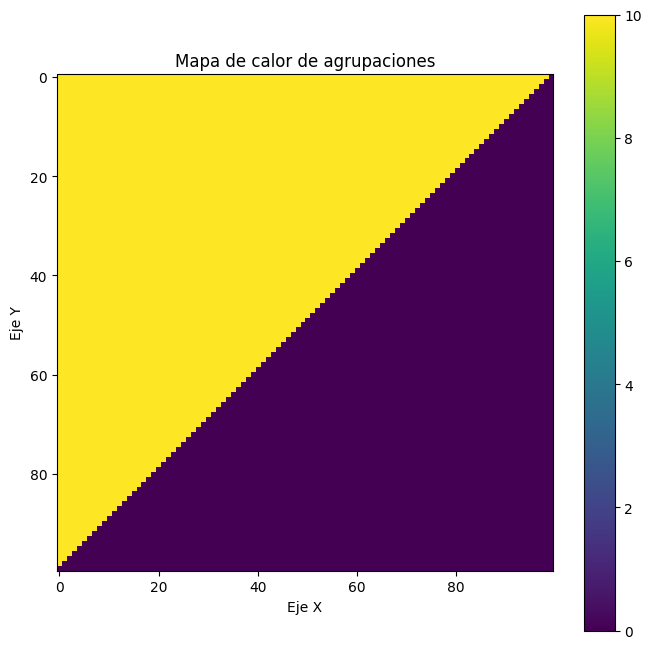

In [29]:
import matplotlib.pyplot as plt

# Utilizando m_agrupaciones (la matriz resultante de las agrupaciones)

# Mostrar el mapa de calor
plt.figure(figsize=(8, 8))
plt.imshow(m_agrupaciones, cmap='viridis', interpolation='nearest')  # Cambia el mapa de colores según tus preferencias
plt.colorbar()  # Agregar la barra de colores para referencia
plt.title('Mapa de calor de agrupaciones')  # Cambia el título según sea necesario
plt.xlabel('Eje X')  # Cambia las etiquetas de los ejes X e Y según tu contexto
plt.ylabel('Eje Y')
plt.grid(False)  # Ocultar las líneas de la cuadrícula si lo prefieres
plt.show()